In [1]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import type_of_target
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [2]:
d =pd.read_csv("Real.csv")
d.info(memory_usage='deep')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930621 entries, 0 to 930620
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     930621 non-null  int64  
 1   List Year         930621 non-null  int64  
 2   Date Recorded     930619 non-null  object 
 3   Town              930621 non-null  object 
 4   Address           930570 non-null  object 
 5   Assessed Value    930621 non-null  float64
 6   Sale Amount       930621 non-null  float64
 7   Sales Ratio       930621 non-null  float64
 8   Property Type     925733 non-null  object 
 9   Residential Type  548176 non-null  object 
 10  Non Use Code      275231 non-null  object 
 11  Assessor Remarks  135512 non-null  object 
 12  OPM remarks       7946 non-null    object 
 13  Location          680517 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 484.7 MB


In [3]:
print ("this dataset represents Maryland's total residential sales from 2002 to 2018.")
print("")
print ("our model purpose is - given the year the real estate was sold,the city it was sold in and the price it sold for,the model will predict the proprety type varying between:Condo,V,R,Single Family and Two Family.")



this dataset represents Maryland's total residential sales from 2002 to 2018.

our model purpose is - given the year the real estate was sold,the city it was sold in and the price it sold for,the model will predict the proprety type varying between:Condo,V,R,Single Family and Two Family.


In [4]:
print("we decided to ignore all the colums besides: Town, List Year,Sale Amount and Property Typem.")
print ("because we belive they are irelevent for our model.")


we decided to ignore all the colums besides: Town, List Year,Sale Amount and Property Typem.
because we belive they are irelevent for our model.


In [5]:
cols=['List Year','Town','Sale Amount','Property Type']
df=pd.read_csv("Real.csv",usecols=cols)

In [6]:
df.isna().sum()

List Year           0
Town                0
Sale Amount         0
Property Type    4888
dtype: int64

In [7]:
print("because our dataframe is so big and the NaN value are so small compared to it we can drop all the nan values and make our model on the smaller dataframe.")
n=df.dropna()

because our dataframe is so big and the NaN value are so small compared to it we can drop all the nan values and make our model on the smaller dataframe.


In [8]:
n.isna().sum()

List Year        0
Town             0
Sale Amount      0
Property Type    0
dtype: int64

In [9]:
n

,List Year,Town,Sale Amount,Property Type
0,2019,Ansonia,284000.0,Single Family
1,2019,Avon,173800.0,Condo
2,2019,Avon,317500.0,Single Family
3,2019,Beacon Falls,229900.0,Single Family
4,2019,Bethany,560000.0,Single Family
...,...,...,...,...
930616,2018,Stamford,214350.0,Residential
930617,2018,West Hartford,176000.0,Residential
930618,2018,Stafford,37000.0,Commercial
930619,2018,Ridgefield,725000.0,Residential


In [10]:
n=n.rename({'List Year':'List_Year','Sale Amount':'Sale_Amount','Property Type':'Property_Type'},axis='columns')
n.drop_duplicates()
dnf=n[(n.Property_Type== 'A')]
dnf

,List_Year,Town,Sale_Amount,Property_Type
208,2001,New Britain,142500.0,A
458,2002,Cheshire,119000.0,A
9447,2002,Hartford,470000.0,A
59366,2003,Stamford,228000.0,A
59368,2003,Stamford,170000.0,A
...,...,...,...,...
390148,2005,Stamford,815000.0,A
390330,2005,Waterbury,240000.0,A
390496,2005,Putnam,250000.0,A
390504,2005,Stamford,115000.0,A


In [11]:
dn=n[(n.Property_Type== 'Single Family')|(n.Property_Type== 'A')|(n.Property_Type== 'Vacant Land')|(n.Property_Type== 'Commercial')|(n.Property_Type== 'Two Family')|(n.Property_Type== 'R')|(n.Property_Type== 'Condo')]
dn

,List_Year,Town,Sale_Amount,Property_Type
0,2019,Ansonia,284000.0,Single Family
1,2019,Avon,173800.0,Condo
2,2019,Avon,317500.0,Single Family
3,2019,Beacon Falls,229900.0,Single Family
4,2019,Bethany,560000.0,Single Family
...,...,...,...,...
930515,2018,Putnam,885000.0,Vacant Land
930518,2018,Waterbury,370000.0,Commercial
930561,2018,Simsbury,325000.0,Commercial
930613,2018,Stamford,900000.0,Commercial


In [12]:
print("we sorted the dataframe to the new dataframe dn,this data only have the wanted property types,this data also have no NaN           values.")

we sorted the dataframe to the new dataframe dn,this data only have the wanted property types,this data also have no NaN           values.


In [13]:
dn.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388176 entries, 0 to 930618
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   List_Year      388176 non-null  int64  
 1   Town           388176 non-null  object 
 2   Sale_Amount    388176 non-null  float64
 3   Property_Type  388176 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 55.6 MB


In [14]:
dn

,List_Year,Town,Sale_Amount,Property_Type
0,2019,Ansonia,284000.0,Single Family
1,2019,Avon,173800.0,Condo
2,2019,Avon,317500.0,Single Family
3,2019,Beacon Falls,229900.0,Single Family
4,2019,Bethany,560000.0,Single Family
...,...,...,...,...
930515,2018,Putnam,885000.0,Vacant Land
930518,2018,Waterbury,370000.0,Commercial
930561,2018,Simsbury,325000.0,Commercial
930613,2018,Stamford,900000.0,Commercial


In [15]:
dn = dn.reset_index()
dn

,index,List_Year,Town,Sale_Amount,Property_Type
0,0,2019,Ansonia,284000.0,Single Family
1,1,2019,Avon,173800.0,Condo
2,2,2019,Avon,317500.0,Single Family
3,3,2019,Beacon Falls,229900.0,Single Family
4,4,2019,Bethany,560000.0,Single Family
...,...,...,...,...,...
388171,930515,2018,Putnam,885000.0,Vacant Land
388172,930518,2018,Waterbury,370000.0,Commercial
388173,930561,2018,Simsbury,325000.0,Commercial
388174,930613,2018,Stamford,900000.0,Commercial


In [16]:
Rv=(dn.Property_Type=='R').sum()
Vv=(dn.Property_Type=='Vacant Land').sum()
SFv=(dn.Property_Type=='Single Family').sum()
TFv=(dn.Property_Type=='Two Family').sum()
Cv=(dn.Property_Type=='Condo').sum()
COv=(dn.Property_Type=='Commercial').sum()
Av=(dn.Property_Type=='A').sum()

TOTALv=388176

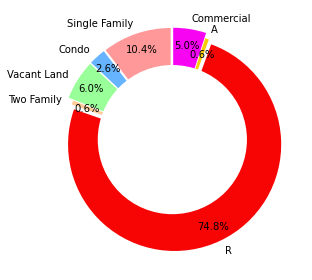

In [17]:
# Pie chart-for the diffrent property types
labels = ['Single Family', 'Condo', 'Vacant Land','Two Family', 'R','A','Commercial']
sizes = [SFv/TOTALv, Cv/TOTALv,Vv/TOTALv, TFv/TOTALv,Rv/TOTALv,Av/TOTALv,COv/TOTALv]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#f70505','#f7cb05','#f705f3']

explode = (0.05,0.05,0.05,0.00,0.05,0.00,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

  
plt.tight_layout()
plt.show()

In [18]:
y=dn.drop(['Property_Type'],axis=1)
x=y.drop(['index'],axis=1)
x

,List_Year,Town,Sale_Amount
0,2019,Ansonia,284000.0
1,2019,Avon,173800.0
2,2019,Avon,317500.0
3,2019,Beacon Falls,229900.0
4,2019,Bethany,560000.0
...,...,...,...
388171,2018,Putnam,885000.0
388172,2018,Waterbury,370000.0
388173,2018,Simsbury,325000.0
388174,2018,Stamford,900000.0


In [19]:
print('defining y as our target')
y=dn['Property_Type']
y

defining y as our target


0         Single Family
1                 Condo
2         Single Family
3         Single Family
4         Single Family
              ...      
388171      Vacant Land
388172       Commercial
388173       Commercial
388174       Commercial
388175       Commercial
Name: Property_Type, Length: 388176, dtype: object

In [20]:
y.value_counts()

R                290287
Single Family     40518
Vacant Land       23414
Commercial        19404
Condo              9932
Two Family         2411
A                  2210
Name: Property_Type, dtype: int64

<AxesSubplot:ylabel='Property_Type'>

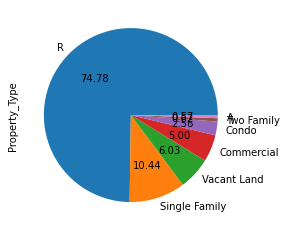

In [21]:
y.value_counts().plot.pie(autopct='%.2f')


Property Type=Single Family, n=40518 (10.438%)
Property Type=Condo, n=9932 (2.559%)
Property Type=R, n=290287 (74.782%)
Property Type=Two Family, n=2411 (0.621%)
Property Type=A, n=2210 (0.569%)
Property Type=Vacant Land, n=23414 (6.032%)
Property Type=Commercial, n=19404 (4.999%)


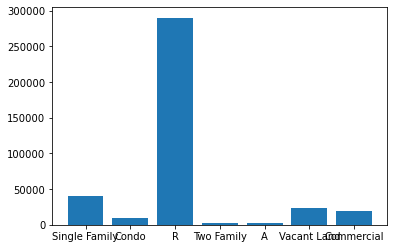

In [22]:
counter=Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Property Type=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

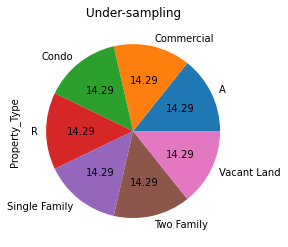

In [23]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='not minority') # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
x_res, y_res = rus.fit_resample(x, y)


ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [24]:
x_res

,List_Year,Town,Sale_Amount
0,2001,New Britain,142500.0
1,2002,Cheshire,119000.0
2,2002,Hartford,470000.0
3,2003,Stamford,228000.0
4,2003,Stamford,170000.0
...,...,...,...
15465,2009,Southington,700000.0
15466,2012,Fairfield,540000.0
15467,2018,Middletown,332000.0
15468,2018,East Hampton,45000.0


In [25]:
y_res

0                  A
1                  A
2                  A
3                  A
4                  A
            ...     
15465    Vacant Land
15466    Vacant Land
15467    Vacant Land
15468    Vacant Land
15469    Vacant Land
Name: Property_Type, Length: 15470, dtype: object

In [26]:
print('creating a test and train datas')
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

creating a test and train datas


In [27]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((12376, 3), (12376,), (3094, 3), (3094,))

In [28]:
x_train_sca=x_train.drop(['Town'],axis=1)

In [29]:
scaler = StandardScaler()

x_train_sca=scaler.fit_transform(x_train_sca)

In [30]:
x_train_sca

array([[ 0.07451851, -0.18443437],
       [-0.94228535, -0.10968726],
       [ 0.94606468, -0.06983741],
       ...,
       [ 0.94606468, -0.15393938],
       [-1.37805843, -0.18902008],
       [-1.08754304, -0.15921295]])

In [31]:
x_test_sca=x_test.drop(['Town'],axis=1)

In [32]:
x_test_sca=scaler.transform(x_test_sca)

In [33]:
x_test_sca

array([[ 0.3650339 , -0.15008738],
       [ 0.94606468, -0.06158313],
       [ 0.94606468, -0.12252725],
       ...,
       [ 0.94606468, -0.20277722],
       [-0.79702765,  0.01045842],
       [-0.07073918, -0.03539871]])

In [34]:
x_train_scaled = pd.DataFrame(x_train_sca,  columns=['List_Year','Sale_Amount'])

In [35]:
x_train_scaled

,List_Year,Sale_Amount
0,0.074519,-0.184434
1,-0.942285,-0.109687
2,0.946065,-0.069837
3,0.510292,-0.207822
4,0.365034,-0.189020
...,...,...
12371,0.946065,-0.140870
12372,-0.942285,-0.215617
12373,0.946065,-0.153939
12374,-1.378058,-0.189020


In [36]:
x_train = x_train.reset_index()
x_train=x_train.drop(['index'],axis=1)


x_train_scaled.insert(loc=1, column="Town",value=x_train["Town"])

x_train_scaled





,List_Year,Town,Sale_Amount
0,0.074519,Woodstock,-0.184434
1,-0.942285,Newtown,-0.109687
2,0.946065,East Lyme,-0.069837
3,0.510292,Bridgeport,-0.207822
4,0.365034,Groton,-0.189020
...,...,...,...
12371,0.946065,Cheshire,-0.140870
12372,-0.942285,Ansonia,-0.215617
12373,0.946065,Middletown,-0.153939
12374,-1.378058,Stamford,-0.189020


In [37]:
x_train_scaled.isna().sum()

List_Year      0
Town           0
Sale_Amount    0
dtype: int64

In [38]:
x_test_scaled= pd.DataFrame(x_test_sca,  columns=['List_Year','Sale_Amount'])
x_test_scaled

,List_Year,Sale_Amount
0,0.365034,-0.150087
1,0.946065,-0.061583
2,0.946065,-0.122527
3,-1.232801,-0.169913
4,0.510292,-0.150500
...,...,...
3089,-0.361255,-0.214242
3090,0.946065,0.079244
3091,0.946065,-0.202777
3092,-0.797028,0.010458


In [39]:
x_test = x_test.reset_index()
x_test=x_test.drop(['index'],axis=1)


x_test_scaled.insert(loc=1, column="Town",value=x_test["Town"])

x_test_scaled


,List_Year,Town,Sale_Amount
0,0.365034,Torrington,-0.150087
1,0.946065,Stamford,-0.061583
2,0.946065,Southbury,-0.122527
3,-1.232801,Bridgeport,-0.169913
4,0.510292,Oxford,-0.150500
...,...,...,...
3089,-0.361255,North Haven,-0.214242
3090,0.946065,Stamford,0.079244
3091,0.946065,Waterbury,-0.202777
3092,-0.797028,Windham,0.010458


In [40]:
x_test_scaled.isna().sum()

List_Year      0
Town           0
Sale_Amount    0
dtype: int64

In [41]:
# x_test_scaled,x_train_scaled- test and train sets both balanced and scaled.

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for Town in x_train_scaled.columns:
    if x_train_scaled[Town].dtype == object:
        x_train_scaled[Town] = le.fit_transform(x_train_scaled[Town])
else:
    pass
for Town in x_test_scaled.columns:
    if x_test_scaled[Town].dtype == object:
        x_test_scaled[Town] = le.fit_transform(x_test_scaled[Town])
else:
    pass

In [43]:
clf = RandomForestClassifier()
Clf = RandomForestClassifier()

In [44]:
# randomforest
clf.fit(x_train_scaled,y_train)
scores1=cross_val_score(Clf,x_train_scaled,y_train,cv=10)
scores1

array([0.68659128, 0.67124394, 0.680937  , 0.67689822, 0.67043619,
       0.66478191, 0.65642684, 0.66046888, 0.66855295, 0.67502021])

In [45]:
scores1.mean()

0.6711357406200575

In [46]:
scores2=cross_val_score(Clf,x_test_scaled,y_test,cv=10)
scores2

array([0.62903226, 0.62580645, 0.61935484, 0.63225806, 0.66666667,
       0.65695793, 0.63754045, 0.66666667, 0.67961165, 0.63430421])

In [47]:
scores2.mean()

0.6448199185718759

In [48]:
#to do list:
    #choose matrix for ranking the model-accuracy scoring
    # regression somthing idk- 
                                                                                                    # split the data to train and test parts-done
                                                                                                    # scale the data of the train and the test separatly
#   ?? analayze the data-coorolation between diffrent variabls-lil summ of cunclusion ??
                                                                                                    #smote the data
    !#choose dummy model that best fit your dataframe
    !# choose diffrent models and try them on the project-try to imporve as much as possible
    # choose the model that preformed the best at the given task and let him try the test.

IndentationError: unexpected indent (Temp/ipykernel_9956/1830539151.py, line 8)